In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Forecasting SPX by using Macro Data

### Theory

We assume that all investors allocate all of their capital into 3 classes of assets:
1. Cash
2. Bonds
3. Equities

Investors switch between assets by buying/selling them through an auction-like process. For example, if equities offer unattractive returns compared to bonds and cash, investors will sell stocks until stock prices are low enough that they become attractive to a willing buyer.

The market price is therefore the current exchange rate between an asset and cash.

We define the supply of an asset as the total market value of the asset (e.g. market cap for stocks). The supply of an asset class relative to other asset classes reflects the prevailing opinion of investors towards that asset class. 

For example, if no investors are willing to hold equities at its current price, the market price of stocks (reflected as the SP500 index SPX) will fall until a willing buyer is found. Therefore, the market cap, which indicates the 'supply' of equities will fall.

We hypothesize that the allocation of investor capital towards equities is mean-reverting. 

The allocation of investor capital towards equities is the relative supply of equities compared to cash and bonds.

\begin{equation}
    \text{Allocation towards equities} = \frac{\text{market cap of SP500}}{\text{total amount of bonds} + \text{total amount of cash}}
\end{equation}

The macro data are downloaded from FRED.

310


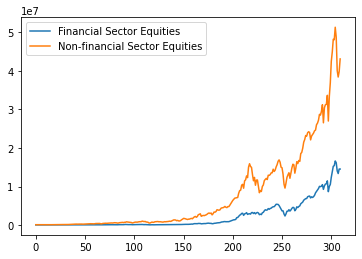

In [70]:
# for market cap of equities, we use the 2 following series:
# Nonfinancial Corporate Business; Corporate Equities; Liability, Level: https://fred.stlouisfed.org/series/NCBEILQ027S
# Domestic Financial Sectors; Corporate Equities; Liability, Level: https://fred.stlouisfed.org/series/FBCELLQ027S

e_df = pd.read_csv('datasets/macro_data/equities.csv')
e_arr = ['NCBEILQ027S', 'FBCELLQ027S']
print(len(e_df))

for f in e_arr:
    e_df = e_df[e_df[f] != "."]


e_df[e_arr] = e_df[e_arr].astype('float')



e_df['FBCELLQ027S'].plot(label='Financial Sector Equities')
e_df['NCBEILQ027S'].plot(label='Non-financial Sector Equities')
plt.legend()
plt.show()


310


[]

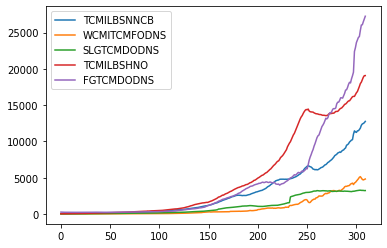

In [69]:
b_df = pd.read_csv('datasets/macro_data/bonds.csv')
print(len(b_df))

b_arr = ['TCMILBSNNCB','WCMITCMFODNS','SLGTCMDODNS','TCMILBSHNO','FGTCMDODNS']

for f in b_arr:
    b_df = b_df[b_df[f] != '.']

b_df[b_arr] = b_df[b_arr].astype('float')


for f in b_arr:
    b_df[f].plot(label=f)
plt.legend()
plt.plot()

In [68]:
df = pd.merge(b_df, e_df)
df['bond_sum'] = np.sum([df[f] for f in b_arr], axis=0)
df['equity_sum'] = np.sum([df[f] for f in e_arr], axis=0) / 1000
df['equity_allocation'] = df['equity_sum'] / (df['equity_sum'] + df['bond_sum'])
df.describe()

,TCMILBSNNCB,WCMITCMFODNS,SLGTCMDODNS,TCMILBSHNO,FGTCMDODNS,NCBEILQ027S,FBCELLQ027S,bond_sum,equity_sum,equity_allocation
count,292.000000,292.000000,292.000000,292.000000,292.000000,2.920000e+02,2.920000e+02,292.000000,292.000000,292.000000
mean,3080.864082,941.802973,1154.764918,5358.963842,4669.905404,8.013033e+06,2.355015e+06,15206.301219,10368.048000,0.356590
std,3339.426333,1331.462923,1205.472966,5905.335721,6413.837984,1.091667e+07,3.595761e+06,17819.133250,14494.397054,0.072556
min,44.653000,5.520000,12.635000,29.442000,220.012000,9.414100e+04,4.821600e+04,337.768000,143.064000,0.219968
25%,274.290000,43.127750,122.687250,411.748750,305.480000,6.498785e+05,9.557300e+04,1161.325250,762.117250,0.291763
50%,1826.095000,298.471000,739.621000,2548.896000,1965.175500,2.242706e+06,3.551145e+05,7381.520000,2612.700000,0.363092
75%,5003.610750,1269.286750,2497.699750,10947.435750,5277.405250,1.291363e+07,3.612476e+06,25007.194000,16431.087250,0.411838
max,12754.437000,5141.514000,3274.124000,19068.887000,27248.228000,5.134122e+07,1.663964e+07,67111.558000,67980.856000,0.518172


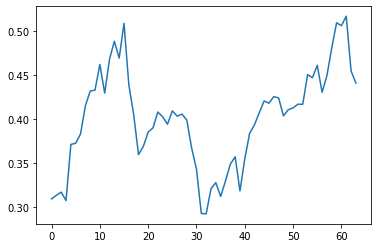

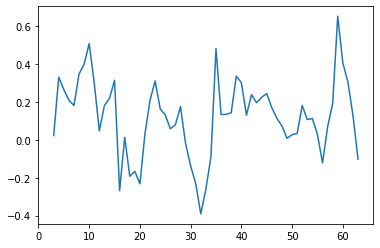

In [67]:
df1 = df[['DATE', 'equity_allocation']].copy()


df2 = pd.read_csv('datasets/stock_price_series/SPY.csv')
df2['returns'] = df2['adjclose'].pct_change(252)
df2['DATE'] = df2['date']

df3 = pd.merge(df1, df2)

df3
df3['equity_allocation'].plot()
plt.show()
df3['returns'].plot()
plt.show()

